## Keywords Statistics

In [ ]:
import os

In [ ]:
from pymongo import MongoClient
import json

mongo_uri_2 = os.getenv("MONGODB_URI_2")
mongo_password_2 = os.getenv("MONGODB_PASSWORD_2")

# If you stored a placeholder password in the URI, replace it here
mongo_uri_2 = mongo_uri_2.replace("<PASSWORD>", mongo_password_2)

# Connect to MongoDB
client = MongoClient(mongo_uri_2)

db = client["Content"]
collection = db["Content"]

# Fetch all documents
data = collection.find()

In [ ]:
list_of_keys = []
for i in range(len(data)):
  keywords = data[i]["keywords"]
  for j in range(len(keywords)):
    list_of_keys.append(keywords[j].lower())

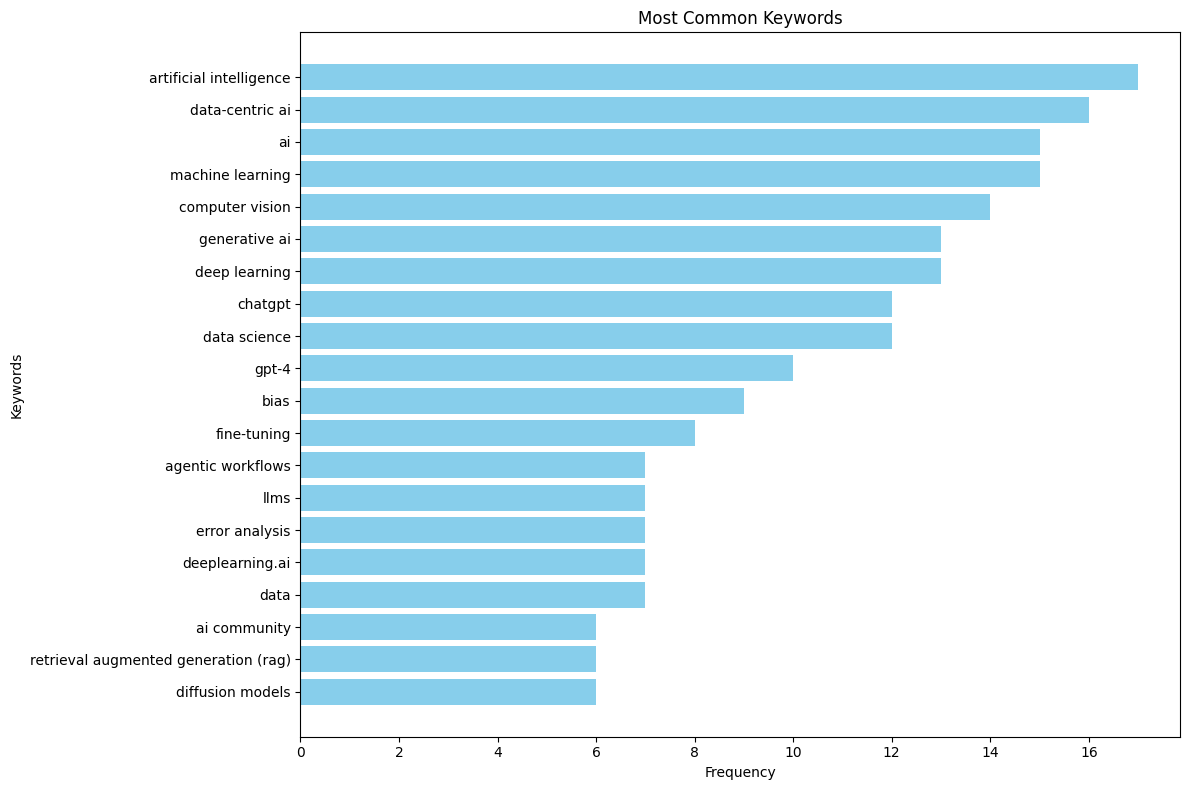

In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np
# Count the frequency of each keyword
word_counts = collections.Counter(list_of_keys)

# Get the 20 most common keywords and their counts
most_common_words = word_counts.most_common(20)

# Separate the keywords and their counts for plotting
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(words)), counts, color='skyblue')
plt.yticks(np.arange(len(words)), words)
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Most Common Keywords')
plt.gca().invert_yaxis()  # Display the most common keyword at the top
plt.tight_layout()